In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error as MSE
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

In [2]:
np.random.seed(42)

# 1. Import the train datasets

In [3]:
X_train = pd.read_csv("A_Normalised_train_data.csv",index_col=0)
Y_train = pd.read_csv("A_Log_sales_train.csv",index_col=0)

In [4]:
Model_1 = DecisionTreeRegressor()

# 2. Setup Pipeline

In [5]:
pca=PCA()
RG = Model_1

In [6]:
# Step 1: PCA
# Step 2: Model
pipe = Pipeline(steps=[("pca",pca),("RG",RG)])

In [7]:
param_grid = {
    "pca__n_components": [5, 10, 30, 45, 60, 100 ,150 ,170],
    "RG__ccp_alpha":[0,0.001,0.005,0.1,0.5,2,8]
    
}

# 3. Setup GridSearch

In [8]:
score_metric = 'neg_mean_squared_error'
search = GridSearchCV(pipe,param_grid,
                      n_jobs=-1,
                      cv=10,
                      scoring=score_metric)

In [9]:
search.fit(X_train,Y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('pca', PCA()),
                                       ('RG', DecisionTreeRegressor())]),
             n_jobs=-1,
             param_grid={'RG__ccp_alpha': [0, 0.001, 0.005, 0.1, 0.5, 2, 8],
                         'pca__n_components': [5, 10, 30, 45, 60, 100, 150,
                                               170]},
             scoring='neg_mean_squared_error')

In [10]:
print("Best parameter (CV score=%0.3f):" % search.best_score_)
print(search.best_params_)

Best parameter (CV score=-0.984):
{'RG__ccp_alpha': 0.005, 'pca__n_components': 150}


In [11]:
df = pd.DataFrame(search.cv_results_)
df = df.sort_values(by=['rank_test_score'])
df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_RG__ccp_alpha,param_pca__n_components,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
22,0.508383,0.061208,0.009794,0.004339,0.005,150,"{'RG__ccp_alpha': 0.005, 'pca__n_components': ...",-0.977416,-0.929953,-0.946264,-1.228533,-1.138732,-1.044383,-0.919917,-0.872456,-0.955544,-0.824735,-0.983793,0.115972,1
23,0.531722,0.069242,0.009426,0.004725,0.005,170,"{'RG__ccp_alpha': 0.005, 'pca__n_components': ...",-0.977416,-0.929953,-0.987966,-1.228533,-1.138732,-1.044383,-0.919917,-0.872456,-0.955544,-0.824735,-0.987963,0.115296,2
17,0.097732,0.018738,0.009973,0.007450,0.005,10,"{'RG__ccp_alpha': 0.005, 'pca__n_components': 10}",-0.902207,-0.924112,-1.001373,-1.200371,-1.082509,-0.980937,-0.943553,-1.005601,-1.051702,-1.054252,-1.014662,0.083264,3
20,0.297570,0.041659,0.010804,0.003516,0.005,60,"{'RG__ccp_alpha': 0.005, 'pca__n_components': 60}",-0.974354,-0.825515,-1.039210,-1.246631,-0.979383,-1.026873,-1.054639,-1.008443,-1.032864,-1.021421,-1.020933,0.097380,4
16,0.079171,0.016032,0.009246,0.004923,0.005,5,"{'RG__ccp_alpha': 0.005, 'pca__n_components': 5}",-0.941162,-0.847011,-1.093749,-1.255860,-1.250906,-0.943901,-0.869433,-1.084710,-0.954711,-0.974680,-1.021612,0.137647,5
18,0.160753,0.009671,0.009046,0.005960,0.005,30,"{'RG__ccp_alpha': 0.005, 'pca__n_components': 30}",-1.040513,-0.990334,-1.049976,-1.047918,-1.086674,-0.963325,-0.942263,-1.066810,-1.064983,-1.002766,-1.025556,0.045697,6
19,0.221703,0.012468,0.004687,0.007159,0.005,45,"{'RG__ccp_alpha': 0.005, 'pca__n_components': 45}",-1.031890,-0.926051,-1.018287,-1.212471,-1.105171,-1.032674,-0.875501,-0.964797,-1.061142,-1.065331,-1.029331,0.089574,7
21,0.449543,0.045484,0.008967,0.004343,0.005,100,"{'RG__ccp_alpha': 0.005, 'pca__n_components': ...",-0.969634,-0.988992,-1.079239,-1.216512,-1.220865,-1.008629,-0.888778,-1.071752,-0.885731,-1.056512,-1.038664,0.110397,8
9,0.093711,0.012934,0.005285,0.006990,0.001,10,"{'RG__ccp_alpha': 0.001, 'pca__n_components': 10}",-1.327829,-0.870223,-1.110609,-1.401158,-1.254847,-1.133726,-1.031493,-1.116438,-1.000162,-1.057386,-1.130387,0.151043,9
14,0.451791,0.032630,0.010171,0.006924,0.001,150,"{'RG__ccp_alpha': 0.001, 'pca__n_components': ...",-1.301228,-0.935746,-1.195781,-1.464375,-1.382334,-1.297193,-1.238176,-1.103938,-1.118432,-0.972391,-1.200959,0.161807,10


# 4. Best Hyperparameter

In [12]:
parms = pd.DataFrame(df['params'])
for i in parms.iloc[0]:
    print(i)

{'RG__ccp_alpha': 0.005, 'pca__n_components': 150}


# 5. Evaluate Model $log(Sales)$

In [13]:
best_pca =parms.iloc[0][0]['pca__n_components']
best_ccp_alpha = parms.iloc[0][0]['RG__ccp_alpha']

In [14]:
Model_2 = DecisionTreeRegressor(ccp_alpha=best_ccp_alpha)

In [15]:
X_train1,X_test1,Y_train1,Y_test1 = train_test_split(X_train,Y_train,test_size=0.2,random_state=132)


In [16]:
pca1 = PCA(n_components=best_pca)
pca1.fit(X_train1)
PX_train1 = pca1.transform(X_train1)
RG1 = Model_2
RG1.fit(PX_train1,Y_train1)

DecisionTreeRegressor(ccp_alpha=0.005)

In [17]:
pca2 = PCA(n_components=best_pca)
pca2.fit(X_test1)
PX_test1 = pca2.transform(X_test1)

In [18]:
MSE(RG1.predict(PX_test1),Y_test1)

1.9334966831039164

In [19]:
result = pd.DataFrame(np.exp(Y_test1))

In [20]:
result["Predicted_sales"] = np.exp(RG1.predict(PX_test1))

In [21]:
MSE(result["sales"],result["Predicted_sales"])

1224.773819695443

# 5.1 Model using original sales data

In [22]:
Model_3 = DecisionTreeRegressor(ccp_alpha=best_ccp_alpha)

In [23]:
OY_train = pd.read_csv("A_sales_train.csv",index_col=0)

In [24]:
X_train2,X_test2,Y_train2,Y_test2 = train_test_split(X_train,OY_train,test_size=0.2,random_state=132)

In [25]:
pca3 = PCA(n_components=best_pca)
pca3.fit(X_train2)
PX_train2 = pca3.transform(X_train2)
RG2 = Model_3
RG2.fit(PX_train2,Y_train2)

DecisionTreeRegressor(ccp_alpha=0.005)

In [26]:
pca4 = PCA(n_components=best_pca)
pca4.fit(X_test2)
PX_test2 = pca4.transform(X_test2)

In [27]:
MSE(RG2.predict(PX_test2),Y_test2)

2987.0157601202636

#### Notably model trained on log(Sales) has lower out-of-sample MSE than model with unmodified Sales

# 6. Inventory Decision

In [28]:
residual = result['sales']-result['Predicted_sales']

In [29]:
Price=20
Cost=12
Salvage=8
Over=Cost - Salvage
Under=Price - Cost
Over, Under

(4, 8)

### QQ plot to explore the distribution of residual

#### Normal Distribution

In [30]:
import scipy.stats as sct

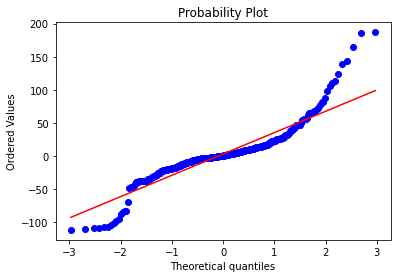

In [31]:
import scipy
scipy.stats.probplot(residual, dist="norm", plot=plt)
plt.show()

In [32]:
s = residual.std()
opt_dec_N=np.ceil(sct.norm.ppf(Under/(Under+Over))*s + result['Predicted_sales'])

#### Exponential Distribution

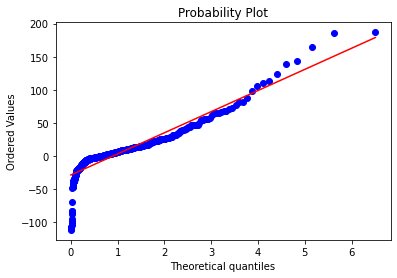

In [33]:
scipy.stats.probplot(residual, dist="expon", plot=plt)
plt.show()

In [34]:
opt_dec_E=np.ceil((-result['Predicted_sales'])*np.log(1-(Under/(Under+Over))))

#### Empirical Distribution

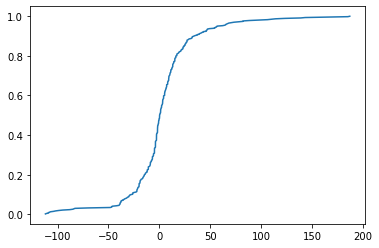

In [35]:
size = residual.shape[0]
step=1/size
jumps = [step*i for i in range(1,size+1)]
Sample = sorted(residual)
plt.plot(Sample,jumps)

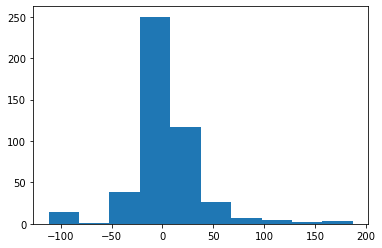

In [36]:
plt.hist(Sample)
plt.show()

In [37]:
def inv(sample,jump,area):
    size = len(sample)
    i=0
    temp=jump[i]
    while temp<area:
        i+=1
        temp=jump[i]
        
    return sample[i]

In [38]:
offset = inv(Sample,jumps,2/3)
offset

8.193746946785616

In [39]:
opt_dec_B = np.ceil(result['Predicted_sales']+offset)

# 7. Out-of-samples Profit

In [40]:
#max profit for test data set
max_profit = result['sales'].sum()*(Price-Cost)
max_profit

82096.0

In [41]:
def profit(demand,inv):
    return (Price-Salvage)*np.minimum(demand,inv)-(Cost-Salvage)*inv

In [52]:
#Profit (None)
profit_lst = profit(round(result['sales']),round(result['Predicted_sales']))
profit_lst.sum()

20856.0

In [42]:
#Profit (Normal)
profit_lst_N = profit(result['sales'],opt_dec_N)
profit_lst_N.sum()

22020.0

In [43]:
#Profit (Exponential)
profit_lst_E = profit(result['sales'],opt_dec_E)
profit_lst_E.sum()

20672.0

In [44]:
#Profit (Empirical)
profit_lst_B = profit(result['sales'],opt_dec_B)
profit_lst_B.sum()

24412.0

# 8. K-Fold Cross Validation

### Repeat steps 5,6,7 with 10-fold cross validation

In [45]:
Model_4=DecisionTreeRegressor(ccp_alpha=best_ccp_alpha)

In [46]:
from sklearn.model_selection import KFold
k=10
kf = KFold(n_splits=k)
X_train_t=X_train.to_numpy()
Y_train_t=Y_train.to_numpy()
model = []
mse_lst = []
max_profit_lst = []
profit_N_lst = []
profit_E_lst = []
profit_B_lst = []

for train_index,test_index in kf.split(X_train_t):
    X_train_K,X_test_K=X_train_t[train_index],X_train_t[test_index]
    Y_train_K,Y_test_K=Y_train_t[train_index],Y_train_t[test_index]
    
    #PCA to transform train data
    pca_K1 = PCA(n_components=best_pca,random_state=42)
    pca_K1.fit(X_train_K)
    PX_train_K = pca_K1.transform(X_train_K)
    
    #Model
    RG_K = Model_4
    RG_K.fit(PX_train_K,Y_train_K)
    
    #pca to transform test data
    pca_K2 = PCA(n_components=best_pca,random_state=42)
    pca_K2.fit(X_test_K)
    PX_test_K = pca_K2.transform(X_test_K)
    
    #MSE
    mse_lst.append(MSE(np.exp(RG_K.predict(PX_test_K)),np.exp(Y_test_K)))
    
    #Transform log(sale) back to sale
    result_K = pd.DataFrame(np.exp(Y_test_K))
    result_K["Predicted_sales"] = np.exp(RG_K.predict(PX_test_K))
    
    #Obtain residual
    residual_K = result_K[0]-result_K['Predicted_sales']
    
    #Get std for Normal distribution
    s_K = residual.std()
    
    #Inventory Decision (Normal)
    opt_dec_N_K=np.ceil(sct.norm.ppf(Under/(Under+Over))*s_K + result_K['Predicted_sales'])
    #Inventory Decision (Exponential)
    opt_dec_E_K=np.ceil((-result_K['Predicted_sales'])*np.log(1-(Under/(Under+Over))))
    
    #Inventory Decision (Empirical Distribution)
    size_K = residual_K.shape[0]
    step_K=1/size_K
    jumps_K = [step_K*i for i in range(1,size+1)]
    Sample_K = sorted(residual_K)
    offset_K = inv(Sample_K,jumps_K,2/3)
    opt_dec_B_K = np.ceil(result_K['Predicted_sales']+offset_K)
    
    #Out-of_sample profit
    profit_lst_B_K = profit(result_K[0],opt_dec_B_K)
    profit_B_lst.append(profit_lst_B_K.sum())
    
    profit_lst_N_K = profit(result_K[0],opt_dec_N_K)
    profit_N_lst.append(profit_lst_N_K.sum())
    
    profit_lst_E_K = profit(result_K[0],opt_dec_E_K)
    profit_E_lst.append(profit_lst_E_K.sum())
    
    max_profit_K = result_K[0].sum()*(Price-Cost)
    max_profit_lst.append(max_profit_K)
    
max_profit_lst = np.array(max_profit_lst)
profit_N_lst = np.array(profit_N_lst)
profit_E_lst = np.array(profit_E_lst)
profit_B_lst = np.array(profit_B_lst)

fraction_of_max_N = profit_N_lst/max_profit_lst
fraction_of_max_E = profit_E_lst/max_profit_lst
fraction_of_max_B = profit_B_lst/max_profit_lst

dist_profit = ["Normal","Exponential","Empirical","Max"]
dist_frac = ["Normal","Exponential","Empirical"]
col_name = ["Dataset_"+str(i) for i in range(1,k+1)]

profit_lst = [profit_N_lst,profit_E_lst,profit_B_lst,max_profit_lst]
profit_table = pd.DataFrame(profit_lst,index=dist_profit,columns=col_name)
profit_table["mean_profit"]=profit_table.mean(axis=1)
profit_table["std_profit"]=profit_table.std(ddof=1,axis=1)

fraction_lst = [fraction_of_max_N,fraction_of_max_E,fraction_of_max_B]
fraction_table = pd.DataFrame(fraction_lst,index=dist_frac,columns=col_name)
fraction_table["mean_fraction"]=fraction_table.mean(axis=1)

In [47]:
fraction_table

,Dataset_1,Dataset_2,Dataset_3,Dataset_4,Dataset_5,Dataset_6,Dataset_7,Dataset_8,Dataset_9,Dataset_10,mean_fraction
Normal,0.218152,0.284250,0.317695,0.211159,0.221193,0.290514,0.168437,0.307546,0.232641,0.192950,0.244454
Exponential,0.261260,0.264274,0.258856,0.221373,0.251088,0.282934,0.215733,0.306938,0.286328,0.259124,0.260791
Empirical,0.276145,0.300424,0.321928,0.240086,0.259871,0.326470,0.227986,0.329575,0.303865,0.278813,0.286516


In [48]:
profit_table

,Dataset_1,Dataset_2,Dataset_3,Dataset_4,Dataset_5,Dataset_6,Dataset_7,Dataset_8,Dataset_9,Dataset_10,mean_profit,std_profit
Normal,9028.0,12864.0,14708.0,9840.0,10980.0,11344.0,8248.0,14184.0,10400.0,8036.0,10963.2,2223.060809
Exponential,10812.0,11960.0,11984.0,10316.0,12464.0,11048.0,10564.0,14156.0,12800.0,10792.0,11689.6,1149.646485
Empirical,11428.0,13596.0,14904.0,11188.0,12900.0,12748.0,11164.0,15200.0,13584.0,11612.0,12832.4,1414.427884
Max,41384.0,45256.0,46296.0,46600.0,49640.0,39048.0,48968.0,46120.0,44704.0,41648.0,44966.4,3203.875254


In [49]:
mse_table = pd.DataFrame(mse_lst,index=col_name,columns=['Cross Validation MSE'])
mse_table

,Cross Validation MSE
Dataset_1,1238.894785
Dataset_2,1239.319239
Dataset_3,1580.682025
Dataset_4,2478.604027
Dataset_5,3984.838562
Dataset_6,986.496340
Dataset_7,2589.709764
Dataset_8,1119.820912
Dataset_9,1868.959193
Dataset_10,1312.077523


In [50]:
print(f"Average 10 fold CV MSE:  {float(mse_table.mean())}")

Average 10 fold CV MSE:  1839.9402370682026


In [51]:
profit_table.to_csv(".\\Model_Selection_Result\\4.1A_Decision_tree.csv")

In [53]:
name = "4.1A_Decision_tree.csv"
mse_table.to_csv(f".\\Model_CV_Result_MSE\\{name}")

In [54]:
f = pd.DataFrame(fraction_table['mean_fraction'])
f = f.transpose().reset_index()
f.to_csv(f".\\Model_CV_Result_Efficiency\\{name}")